<a href="https://colab.research.google.com/github/akanksha0911/ML_clustering_GMM/blob/main/ML_Assign2_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# importing the relevant libraries
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib as mp
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import silhouette_score

# Change defaults
sns.set(style='whitegrid', context='talk', palette='rainbow')

import plotly.io as pio
import plotly.express as px

pio.templates.default = 'plotly_dark'
pd.set_option('display.max_columns', None)

In [6]:
events = pd.read_csv('/content/drive/MyDrive/Kaggle_data/Football_events/events.csv')
game_info = pd.read_csv('/content/drive/MyDrive/Kaggle_data/Football_events/ginf.csv')
definitions = open('/content/drive/MyDrive/Kaggle_data/Football_events/dictionary.txt', "r").readlines()

In [7]:
game_info.head()

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN


In [8]:
events.isna().count()

id_odsp          941009
id_event         941009
sort_order       941009
time             941009
text             941009
event_type       941009
event_type2      941009
side             941009
event_team       941009
opponent         941009
player           941009
player2          941009
player_in        941009
player_out       941009
shot_place       941009
shot_outcome     941009
is_goal          941009
location         941009
bodypart         941009
assist_method    941009
situation        941009
fast_break       941009
dtype: int64

In [ ]:
events.head()


In [10]:
game_info.columns

Index(['id_odsp', 'link_odsp', 'adv_stats', 'date', 'league', 'season',
       'country', 'ht', 'at', 'fthg', 'ftag', 'odd_h', 'odd_d', 'odd_a',
       'odd_over', 'odd_under', 'odd_bts', 'odd_bts_n'],
      dtype='object')

Which teams are the best/worst in their home/away games?



By best/worst, we're talking in terms of average goal difference (home goals-away goals). This metric captures both the inclination to win and the scoring performance.


In [11]:
game_info['goal_differential_home-away']=game_info['fthg']-game_info['ftag']

home_perf=game_info.groupby('ht')['goal_differential_home-away'].mean().sort_values()
home_perf

ht
SpVgg Greuther Furth   -1.444444
US Pescara             -1.379310
Wolves                 -1.263158
Cordoba                -1.105263
Kaiserslautern         -0.944444
                          ...   
Manchester City         1.735849
Paris Saint-Germain     1.904762
Bayern Munich           2.393617
Real Madrid             2.504762
Barcelona               2.701923
Name: goal_differential_home-away, Length: 147, dtype: float64

In [12]:
away_perf=(-1*game_info.groupby('at')['goal_differential_home-away'].mean()).sort_values()
away_perf

at
Frosinone                    -1.736842
US Pescara                   -1.517241
Livorno                      -1.473684
TSV Eintracht Braunschweig   -1.470588
Cardiff                      -1.421053
                                ...   
Paris Saint-Germain           0.915094
Juventus                      0.971154
Real Madrid                   1.359223
Barcelona                     1.447619
Bayern Munich                 1.462366
Name: goal_differential_home-away, Length: 148, dtype: float64

In [13]:
game_info

,id_odsp,link_odsp,adv_stats,date,league,season,country,ht,at,fthg,ftag,odd_h,odd_d,odd_a,odd_over,odd_under,odd_bts,odd_bts_n,goal_differential_home-away
0,UFot0hit/,/soccer/germany/bundesliga-2011-2012/dortmund-...,True,2011-08-05,D1,2012,germany,Borussia Dortmund,Hamburg SV,3,1,1.56,4.41,7.42,NaN,NaN,NaN,NaN,2
1,Aw5DflLH/,/soccer/germany/bundesliga-2011-2012/augsburg-...,True,2011-08-06,D1,2012,germany,FC Augsburg,SC Freiburg,2,2,2.36,3.60,3.40,NaN,NaN,NaN,NaN,0
2,bkjpaC6n/,/soccer/germany/bundesliga-2011-2012/werder-br...,True,2011-08-06,D1,2012,germany,Werder Bremen,Kaiserslautern,2,0,1.83,4.20,4.80,NaN,NaN,NaN,NaN,2
3,CzPV312a/,/soccer/france/ligue-1-2011-2012/paris-sg-lori...,True,2011-08-06,F1,2012,france,Paris Saint-Germain,Lorient,0,1,1.55,4.50,9.40,NaN,NaN,NaN,NaN,-1
4,GUOdmtII/,/soccer/france/ligue-1-2011-2012/caen-valencie...,True,2011-08-06,F1,2012,france,Caen,Valenciennes,1,0,2.50,3.40,3.45,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,xAkY8l6R/,/soccer/italy/serie-a/genoa-crotone-xAkY8l6R/,True,2017-01-22,I1,2017,italy,Genoa,Crotone,2,2,1.97,4.35,8.00,1.95,2.03,2.03,1.86,0
10108,xSU9scI9/,/soccer/england/premier-league/chelsea-hull-ci...,True,2017-01-22,E0,2017,england,Chelsea,Hull,2,0,1.19,8.50,20.00,1.54,2.68,2.40,1.66,2
10109,xY7uZwOI/,/soccer/france/ligue-1/monaco-lorient-xY7uZwOI/,True,2017-01-22,F1,2017,france,AS Monaco,Lorient,4,0,1.32,6.24,11.50,1.53,3.08,1.80,2.25,4
10110,YyeGxMX8/,/soccer/spain/laliga/betis-gijon-YyeGxMX8/,True,2017-01-22,SP1,2017,spain,Real Betis,Sporting Gijon,0,0,1.74,4.07,5.90,2.20,1.89,2.05,1.86,0



Team similarity (KMeans)

In this section, we prepare a dataset for team performance and apply KMeans clustering.


Features are:

    On-pitch violence (yellow cards, red cards, fouls)
    Goalscoring circumstances (play situation, play location, assist method)
    Goal count

In [14]:
events['shot_outcome'].unique()

array([ 2., nan,  1.,  3.,  4.])

In [15]:
goals=events[events['shot_outcome']==1] #1 is on target

In [16]:
goals=goals[goals['text'].apply(lambda x:'Goal' in x)]
goals

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,event_team,opponent,player,player2,player_in,player_out,shot_place,shot_outcome,is_goal,location,bodypart,assist_method,situation,fast_break
13,UFot0hit/,UFot0hit14,14,17,"Goal! Borussia Dortmund 1, Hamburg 0. Kevin G...",1,12.0,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,mario gotze,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
26,UFot0hit/,UFot0hit27,27,29,"Goal! Borussia Dortmund 2, Hamburg 0. Mario G...",1,12.0,1,Borussia Dortmund,Hamburg SV,mario gotze,robert lewandowski,NaN,NaN,5.0,1.0,1,3.0,1.0,1,1.0,0
50,UFot0hit/,UFot0hit51,51,49,"Goal! Borussia Dortmund 3, Hamburg 0. Kevin G...",1,NaN,1,Borussia Dortmund,Hamburg SV,kevin grosskreutz,NaN,NaN,NaN,4.0,1.0,1,13.0,1.0,0,3.0,0
92,UFot0hit/,UFot0hit93,93,80,"Goal! Borussia Dortmund 3, Hamburg 1. Robert ...",1,NaN,2,Hamburg SV,Borussia Dortmund,robert tesche,NaN,NaN,NaN,3.0,1.0,1,3.0,2.0,0,3.0,0
175,Aw5DflLH/,Aw5DflLH66,66,48,"Goal! FC Augsburg 0, SC Freiburg 1. Papiss De...",1,12.0,2,SC Freiburg,FC Augsburg,papiss demba cisse,felix bastians,NaN,NaN,3.0,1.0,1,15.0,1.0,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940713,xY7uZwOI/,xY7uZwOI26,26,24,"Goal! Monaco 1, Lorient 0. Boschilia (Monaco)...",1,NaN,1,AS Monaco,Lorient,boschilia,NaN,NaN,NaN,5.0,1.0,1,3.0,2.0,0,1.0,0
940716,xY7uZwOI/,xY7uZwOI29,29,28,"Goal! Monaco 2, Lorient 0. Boschilia (Monaco)...",1,12.0,1,AS Monaco,Lorient,boschilia,bernardo silva,NaN,NaN,4.0,1.0,1,9.0,2.0,1,1.0,0
940722,xY7uZwOI/,xY7uZwOI35,35,37,"Goal! Monaco 3, Lorient 0. Valere Germain (Mo...",1,NaN,1,AS Monaco,Lorient,valere germain,NaN,NaN,NaN,4.0,1.0,1,9.0,1.0,0,1.0,0
940742,xY7uZwOI/,xY7uZwOI58,58,59,"Goal! Monaco 4, Lorient 0. Valere Germain (Mo...",1,12.0,1,AS Monaco,Lorient,valere germain,djibril sidibe,NaN,NaN,5.0,1.0,1,11.0,1.0,1,1.0,0


In [17]:
teams=events[['id_odsp','event_team','event_type','location','assist_method','situation']]

In [ ]:
teams

In [ ]:
team_names=teams['event_team'].unique()
team_names

In [ ]:
yellow=(teams.groupby('event_team')['event_type'].apply(lambda x: (x==4).sum())
       +teams.groupby('event_team')['event_type'].apply(lambda x: (x==5).sum())) #yellow_cards
yellow       

In [ ]:
red=teams.groupby('event_team')['event_type'].apply(lambda x: (x==6).sum()) #red_cards
red

In [ ]:
foul=teams.groupby('event_team')['event_type'].apply(lambda x: (x==3).sum()) #fouls
foul

In [ ]:
attemp=teams.groupby('event_team')['event_type'].apply(lambda x: (x==1).sum()) #total attempts
attemp

In [ ]:
situation=teams.dropna().groupby('event_team')['situation'].value_counts()
situation

In [ ]:
location=teams.dropna().groupby('event_team')['location'].value_counts()
location

In [ ]:
assist_method=teams.dropna().groupby('event_team')['assist_method'].value_counts()
assist_method

In [ ]:
#The ugliest piece of code I've ever written
d=dict()
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in un:
        sample=teams[teams[var]==i]
        l.append(sample.dropna().groupby('event_team')[var].count())
    d[var]=l

d

In [27]:
nb_goals=goals.groupby('event_team')['event_team'].count()
nb_goals

event_team
AC Ajaccio           110
AC Milan             320
AJ Auxerre            46
AS Monaco            228
AS Nancy Lorraine     87
                    ... 
Villarreal           203
Watford               64
Werder Bremen        249
West Brom            134
West Ham             167
Name: event_team, Length: 142, dtype: int64

In [53]:
data1=pd.concat([yellow,red,foul,attemp],axis=1)
data1.columns=['yellow','red','foul','attemp']
data1

,yellow,red,foul,attemp
event_team,,,,
AC Ajaccio,238,12,1593,1106
AC Milan,502,18,2677,3065
AJ Auxerre,89,3,558,446
AS Monaco,243,8,1666,1665
AS Nancy Lorraine,160,7,1260,1058
...,...,...,...,...
Villarreal,393,5,2045,1849
Watford,130,4,725,678
Werder Bremen,375,10,2645,2318


In [55]:
data1['team']=data1.index
data1['goals']=nb_goals
data1

,yellow,red,foul,attemp,team,goals
event_team,,,,,,
AC Ajaccio,238,12,1593,1106,AC Ajaccio,110
AC Milan,502,18,2677,3065,AC Milan,320
AJ Auxerre,89,3,558,446,AJ Auxerre,46
AS Monaco,243,8,1666,1665,AS Monaco,228
AS Nancy Lorraine,160,7,1260,1058,AS Nancy Lorraine,87
...,...,...,...,...,...,...
Villarreal,393,5,2045,1849,Villarreal,203
Watford,130,4,725,678,Watford,64
Werder Bremen,375,10,2645,2318,Werder Bremen,249


In [56]:
# data.drop(['foul','red','yellow'],axis=1,inplace=True)

In [ ]:
for var in ['situation','location','assist_method']:
    un=teams[var].unique().tolist()
    l=[]
    for i in range(len(un)):
        data1[var+'_'+str(un[i])]=data1['team'].map(d[var][i].to_dict())
data1

In [58]:
data1.dropna(axis=1, how='all', inplace=True)
data1.fillna(0, inplace=True)


In [ ]:
data1.head()

data_gmm = data1
data_gmm #for GMM clustering

In [34]:

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data1.drop(['team'],axis=1))
data1['labels']=kmeans.labels_

In [35]:
data1

,yellow,red,foul,team,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4,labels
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,0
AC Milan,502,18,2677,AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,1
AJ Auxerre,89,3,558,AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,2
AS Monaco,243,8,1666,AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,0
AS Nancy Lorraine,160,7,1260,AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,393,5,2045,Villarreal,203,1578,146,42,83,164,709,512,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0,0
Watford,130,4,725,Watford,64,574,46,12,46,53,296,205,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,0.0,301,213,117,42,5.0,2
Werder Bremen,375,10,2645,Werder Bremen,249,1912,208,49,149,184,885,726,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0,1


In [36]:
from sklearn.decomposition import PCA
pca = PCA(2)
 
#Transform the data
data2 = pca.fit_transform(data1.drop('team',axis=1))

In [37]:
data1['var_1']=data2[:,0]
data1['var_2']=data2[:,1]

In [38]:
data1

,yellow,red,foul,team,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4,labels,var_1,var_2
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,0,-513.350077,-339.214794
AC Milan,502,18,2677,AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,1,2039.190219,252.490616
AJ Auxerre,89,3,558,AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,2,-1764.001282,2.677256
AS Monaco,243,8,1666,AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,0,34.364294,3.309003
AS Nancy Lorraine,160,7,1260,AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,0,-755.857571,-94.230811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,393,5,2045,Villarreal,203,1578,146,42,83,164,709,512,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0,0,470.003872,-143.962763
Watford,130,4,725,Watford,64,574,46,12,46,53,296,205,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,0.0,301,213,117,42,5.0,2,-1426.910319,48.070838
Werder Bremen,375,10,2645,Werder Bremen,249,1912,208,49,149,184,885,726,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0,1,1226.146154,-313.277207


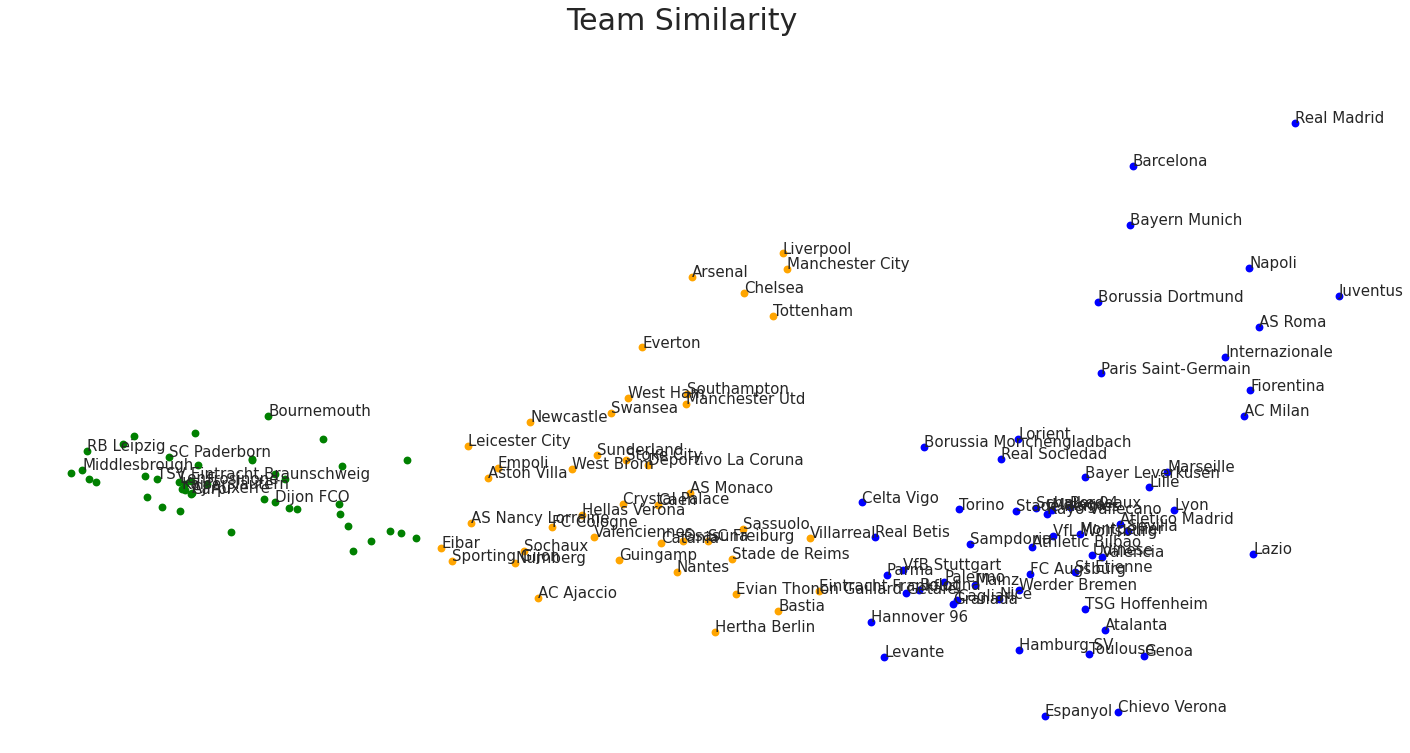

In [39]:
col=['orange','blue','green','red','yellow']


fig, ax = plt.subplots(figsize=(25,12))

fig.suptitle('Team Similarity',fontsize=30)
for i in range (5):
    filt=data1[data1['labels']==i]
    t=filt['team'].tolist()
    ax.scatter(filt['var_1'],filt['var_2'],color=col[i],s=40)
    
    if 'Real Madrid' in t or 'Arsenal' in t:
        for j, txt in enumerate(t):
            ax.annotate(txt, (filt['var_1'].iloc[j], filt['var_2'].iloc[j]),fontsize=15)
    else:
        for j, txt in enumerate(t):
            if j%4==0:
                ax.annotate(txt, (filt['var_1'].iloc[j], filt['var_2'].iloc[j]),fontsize=15)

plt.axis('off')
plt.show()


In [40]:
!pip install kmeans-pytorch

In [41]:
!pip install fast-pytorch-kmeans

     |████████████████████████████████| 46 kB 3.3 MB/s 
  Created wheel for fast-pytorch-kmeans: filename=fast_pytorch_kmeans-0.1.6-py3-none-any.whl size=7088 sha256=4c147401c32f5a448fd42f1dd9a3702346c82c71474f01b59030c21fd5927c05
  Stored in directory: /root/.cache/pip/wheels/90/1c/31/71496b1753c1ca617185f8ef5e4fbb77a9d36facf5eb73b352
Successfully built fast-pytorch-kmeans


In [42]:
data1

,yellow,red,foul,team,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4,labels,var_1,var_2
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,AC Ajaccio,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,0,-513.350077,-339.214794
AC Milan,502,18,2677,AC Milan,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,1,2039.190219,252.490616
AJ Auxerre,89,3,558,AJ Auxerre,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,2,-1764.001282,2.677256
AS Monaco,243,8,1666,AS Monaco,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,0,34.364294,3.309003
AS Nancy Lorraine,160,7,1260,AS Nancy Lorraine,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,0,-755.857571,-94.230811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,393,5,2045,Villarreal,203,1578,146,42,83,164,709,512,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0,0,470.003872,-143.962763
Watford,130,4,725,Watford,64,574,46,12,46,53,296,205,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,0.0,301,213,117,42,5.0,2,-1426.910319,48.070838
Werder Bremen,375,10,2645,Werder Bremen,249,1912,208,49,149,184,885,726,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0,1,1226.146154,-313.277207


In [43]:
!pip install kmeans-pytorch


In [44]:
import torch

from kmeans_pytorch import kmeans, kmeans_predict
test_data = data1.drop(['team'],axis=1)

test_data


,yellow,red,foul,goals,situation_1.0,situation_3.0,situation_4.0,situation_2.0,location_9.0,location_15.0,location_3.0,location_11.0,location_13.0,location_16.0,location_17.0,location_7.0,location_8.0,location_12.0,location_10.0,location_19.0,location_6.0,location_14.0,location_18.0,assist_method_1,assist_method_0,assist_method_2,assist_method_3,assist_method_4,labels,var_1,var_2
event_team,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,238,12,1593,110,913,74,33,86,71,457,336,92,27,24.0,20.0,9.0,10.0,12,13,8.0,9.0,15,3.0,490,344,198,43,31.0,0,-513.350077,-339.214794
AC Milan,502,18,2677,320,2615,219,87,144,215,1465,784,256,93,23.0,19.0,28.0,35.0,29,34,22.0,10.0,51,1.0,1556,865,477,61,106.0,1,2039.190219,252.490616
AJ Auxerre,89,3,558,46,364,41,23,18,48,173,123,33,18,5.0,8.0,4.0,4.0,10,10,2.0,6.0,1,1.0,174,144,92,16,20.0,2,-1764.001282,2.677256
AS Monaco,243,8,1666,228,1387,142,50,86,131,607,558,128,56,11.0,9.0,19.0,16.0,44,32,18.0,8.0,26,2.0,754,446,363,49,53.0,0,34.364294,3.309003
AS Nancy Lorraine,160,7,1260,87,874,86,29,69,85,502,261,82,28,17.0,16.0,11.0,4.0,14,15,4.0,7.0,10,2.0,523,267,193,42,33.0,0,-755.857571,-94.230811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Villarreal,393,5,2045,203,1578,146,42,83,164,709,512,191,64,9.0,10.0,35.0,26.0,46,34,11.0,11.0,24,3.0,924,493,295,43,94.0,0,470.003872,-143.962763
Watford,130,4,725,64,574,46,12,46,53,296,205,49,14,1.0,8.0,14.0,6.0,9,9,4.0,1.0,9,0.0,301,213,117,42,5.0,2,-1426.910319,48.070838
Werder Bremen,375,10,2645,249,1912,208,49,149,184,885,726,184,70,34.0,15.0,26.0,31.0,42,50,17.0,24.0,27,3.0,1082,674,415,108,39.0,1,1226.146154,-313.277207


In [45]:
x = torch.tensor(test_data.to_numpy())
x

tensor([[ 2.3800e+02,  1.2000e+01,  1.5930e+03,  ...,  0.0000e+00,
         -5.1335e+02, -3.3921e+02],
        [ 5.0200e+02,  1.8000e+01,  2.6770e+03,  ...,  1.0000e+00,
          2.0392e+03,  2.5249e+02],
        [ 8.9000e+01,  3.0000e+00,  5.5800e+02,  ...,  2.0000e+00,
         -1.7640e+03,  2.6773e+00],
        ...,
        [ 3.7500e+02,  1.0000e+01,  2.6450e+03,  ...,  1.0000e+00,
          1.2261e+03, -3.1328e+02],
        [ 2.3000e+02,  6.0000e+00,  1.3280e+03,  ...,  0.0000e+00,
         -3.9062e+02,  8.1647e+01],
        [ 2.2600e+02,  1.0000e+01,  1.2710e+03,  ...,  0.0000e+00,
         -1.8768e+02,  3.1319e+02]], dtype=torch.float64)

In [46]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
else:
    device = torch.device('cpu')


In [47]:
cluster_ids_x, cluster_centers = kmeans(
    X=x, num_clusters=3, distance='euclidean', device=device
)

running k-means on cuda:0..


[running kmeans]: 6it [00:00, 53.23it/s, center_shift=0.000000, iteration=6, tol=0.000100]


In [48]:
print(cluster_ids_x)
print(cluster_centers)

tensor([2, 0, 1, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 2,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1,
        0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0,
        0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 1, 2, 0,
        0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 0, 2, 0, 0, 2, 1, 0, 2, 2])
tensor([[ 4.3750e+02,  1.2554e+01,  2.5234e+03,  2.7355e+02,  2.1326e+03,
          2.0121e+02,  6.1929e+01,  1.2696e+02,  2.1154e+02,  1.0221e+03,
          7.6713e+02,  2.0477e+02,  7.4286e+01,  2.2411e+01,  2.1518e+01,
          2.8946e+01,  2.8018e+01,  3.7857e+01,  3.8643e+01,  1.5786e+01,
          1.7518e+01,  2.9464e+01,  2.7500e+00,  1.2129e+03,  6.6839e+02,
          4.7168e+02,  8.0232e+01,  8.9518e+01,  1.0000e+00,  1.3833e+03,
         -4.7055e+01],
        [ 1.1425e+02,  3.1818e+00,  6.3245e+02,  4.5614e+0

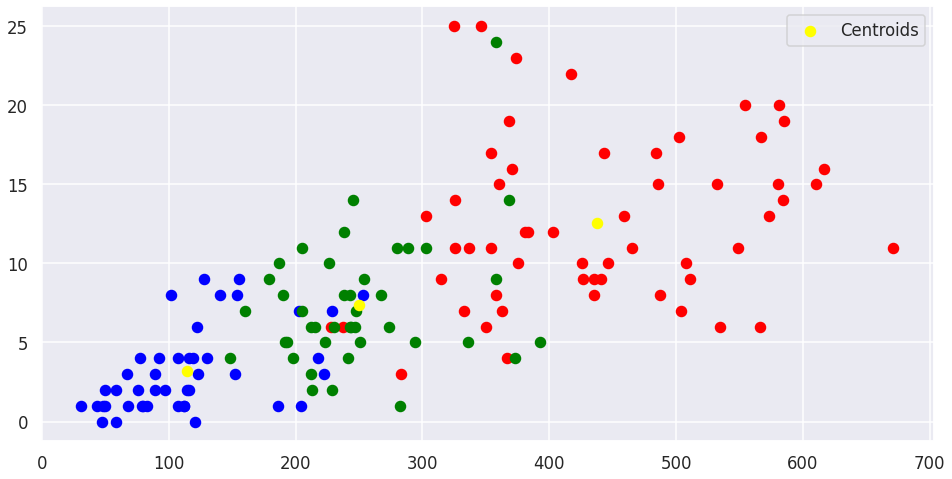

In [49]:

sns.set_style("darkgrid")
plt.figure(figsize = (16,8))
plt.scatter(x[cluster_ids_x == 0, 0], x[cluster_ids_x == 0, 1], 
            s = 100, c = 'red')
plt.scatter(x[cluster_ids_x == 1, 0], x[cluster_ids_x == 1, 1], 
            s = 100, c = 'blue')
plt.scatter(x[cluster_ids_x == 2, 0], x[cluster_ids_x == 2, 1],
            s = 100, c = 'green')


# Plotting the centroids of the clusters
plt.scatter(cluster_centers[:, 0], cluster_centers[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## **Clustering Using GMM algorithm**

In [ ]:
data_gmm.head()

In [ ]:
fig2 = px.scatter_3d(data_gmm, x="yellow", y="red",z="foul",
                     color="team",size="goals")
fig2.update_layout(title="5 Features Representation")
fig2.show()

In [66]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [67]:
X=data_gmm[['attemp', 'goals']]
column_names =['attemp', 'goals']
X.head()

,attemp,goals
event_team,,
AC Ajaccio,1106,110
AC Milan,3065,320
AJ Auxerre,446,46
AS Monaco,1665,228
AS Nancy Lorraine,1058,87


In [68]:
scalar = MinMaxScaler()
X[column_names] = scalar.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [78]:
X.head()



,attemp,goals,gmm_cluster
event_team,,,
AC Ajaccio,0.263705,0.170863,0
AC Milan,0.814450,0.548561,3
AJ Auxerre,0.078156,0.055755,1
AS Monaco,0.420860,0.383094,3
AS Nancy Lorraine,0.250211,0.129496,0


In [ ]:
X_Kmeans = X
X_Kmeans

## **Performing Silhouette analysis to find optimal number of clusters**

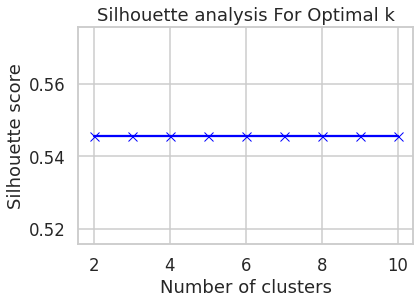

In [71]:
# calculate the Sillhoutte Score

range_of_clusters = range(2, 11)
silhouette_avgerage = []
for num_clusters in range_of_clusters:
  gmm = GaussianMixture(n_components=i,covariance_type="full", random_state=0)
  gmm.fit(X)

  labels = gmm.predict(X)
  silhouette_avgerage.append(silhouette_score(X, labels, metric = 'euclidean', random_state=0))
  
 
  # plot silhouette score
plot.plot(range_of_clusters,silhouette_avgerage,'bx-')
plot.xlabel('Number of clusters')
plot.ylabel('Silhouette score')
plot.title('Silhouette analysis For Optimal k')
plot.show()

In [72]:
gmm_clust = GaussianMixture(n_components=4)
gmm_clust.fit(X)

GaussianMixture(n_components=4)

In [73]:
X['gmm_cluster'] = gmm_clust.predict(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


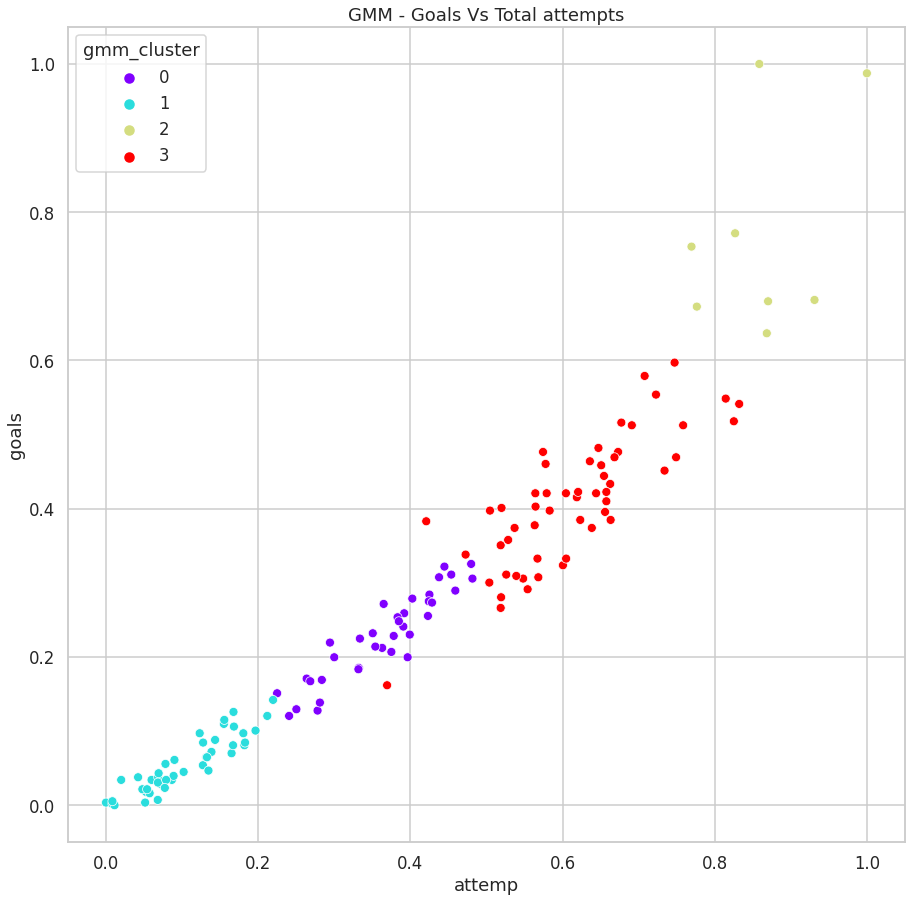

In [76]:
# plot GMM clusters
sns.set_context('talk')
plot.figure(figsize=(15,15))
sns.scatterplot(x=X['attemp'],y=X['goals'],hue=X['gmm_cluster'], palette='rainbow')
plot.title('GMM - Goals Vs Total attempts')
plot.show()

From the above scatterplot, following clusters can be inferenced:-

*   Cluster 0 - Teams with average attempts and average goals.
*   Cluster 1 - Team with less Goals and less number of attempts.
*   Cluster 2 - Teams with more Goals and more number of attempts. Indicates the high performing teams.
*   Cluster 3 - Teams with more goals and more number of attempts. 
The K-means and Gaussian Misture provides a similar results for clustering.

## **Comparision with K-means algorithm**

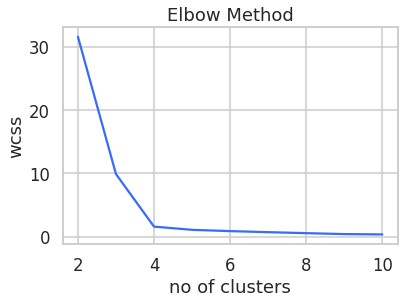

In [79]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans_model = kmeans.fit(X_Kmeans)
    wcss.append(kmeans.inertia_)     
plot.plot(range(2,11), wcss,)
plot.title('Elbow Method')
plot.xlabel('no of clusters')
plot.ylabel('wcss')
plot.show()

In [ ]:
colors = ['b', 'g', 'r','y']
markers = ['o', 'v', 's','+']
kmeans_model = KMeans(4).fit(X_Kmeans)
X_Kmeans['kmeans_cluster'] = kmeans_model.predict(X_Kmeans)

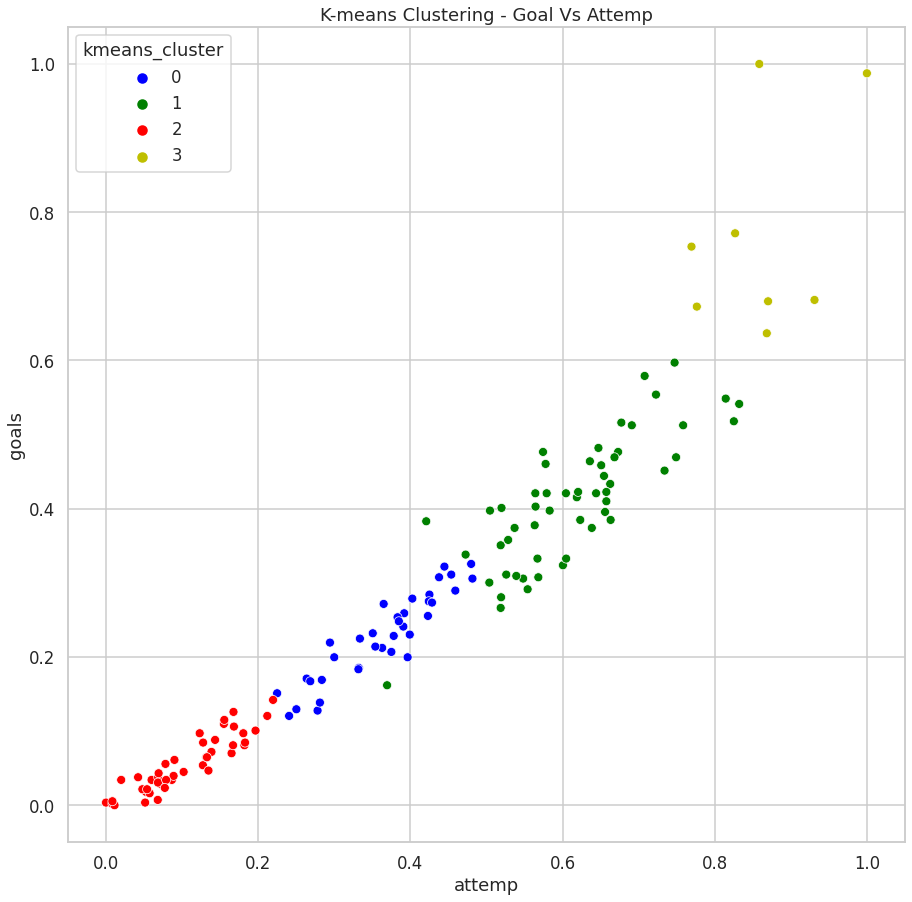

In [82]:
sns.set_context('talk')
plot.figure(figsize=(15,15))
sns.scatterplot(x=X_Kmeans['attemp'],y=X_Kmeans['goals'],hue=X_Kmeans['kmeans_cluster'], palette=colors)
plot.title('K-means Clustering - Goal Vs Attemp')
plot.show()

##**The K-means and Gaussian Misture provides a similar results for clustering.**